# House Rent Predictor By Sayan

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [2]:
data= pd.read_csv("data.csv")

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.shape

(506, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

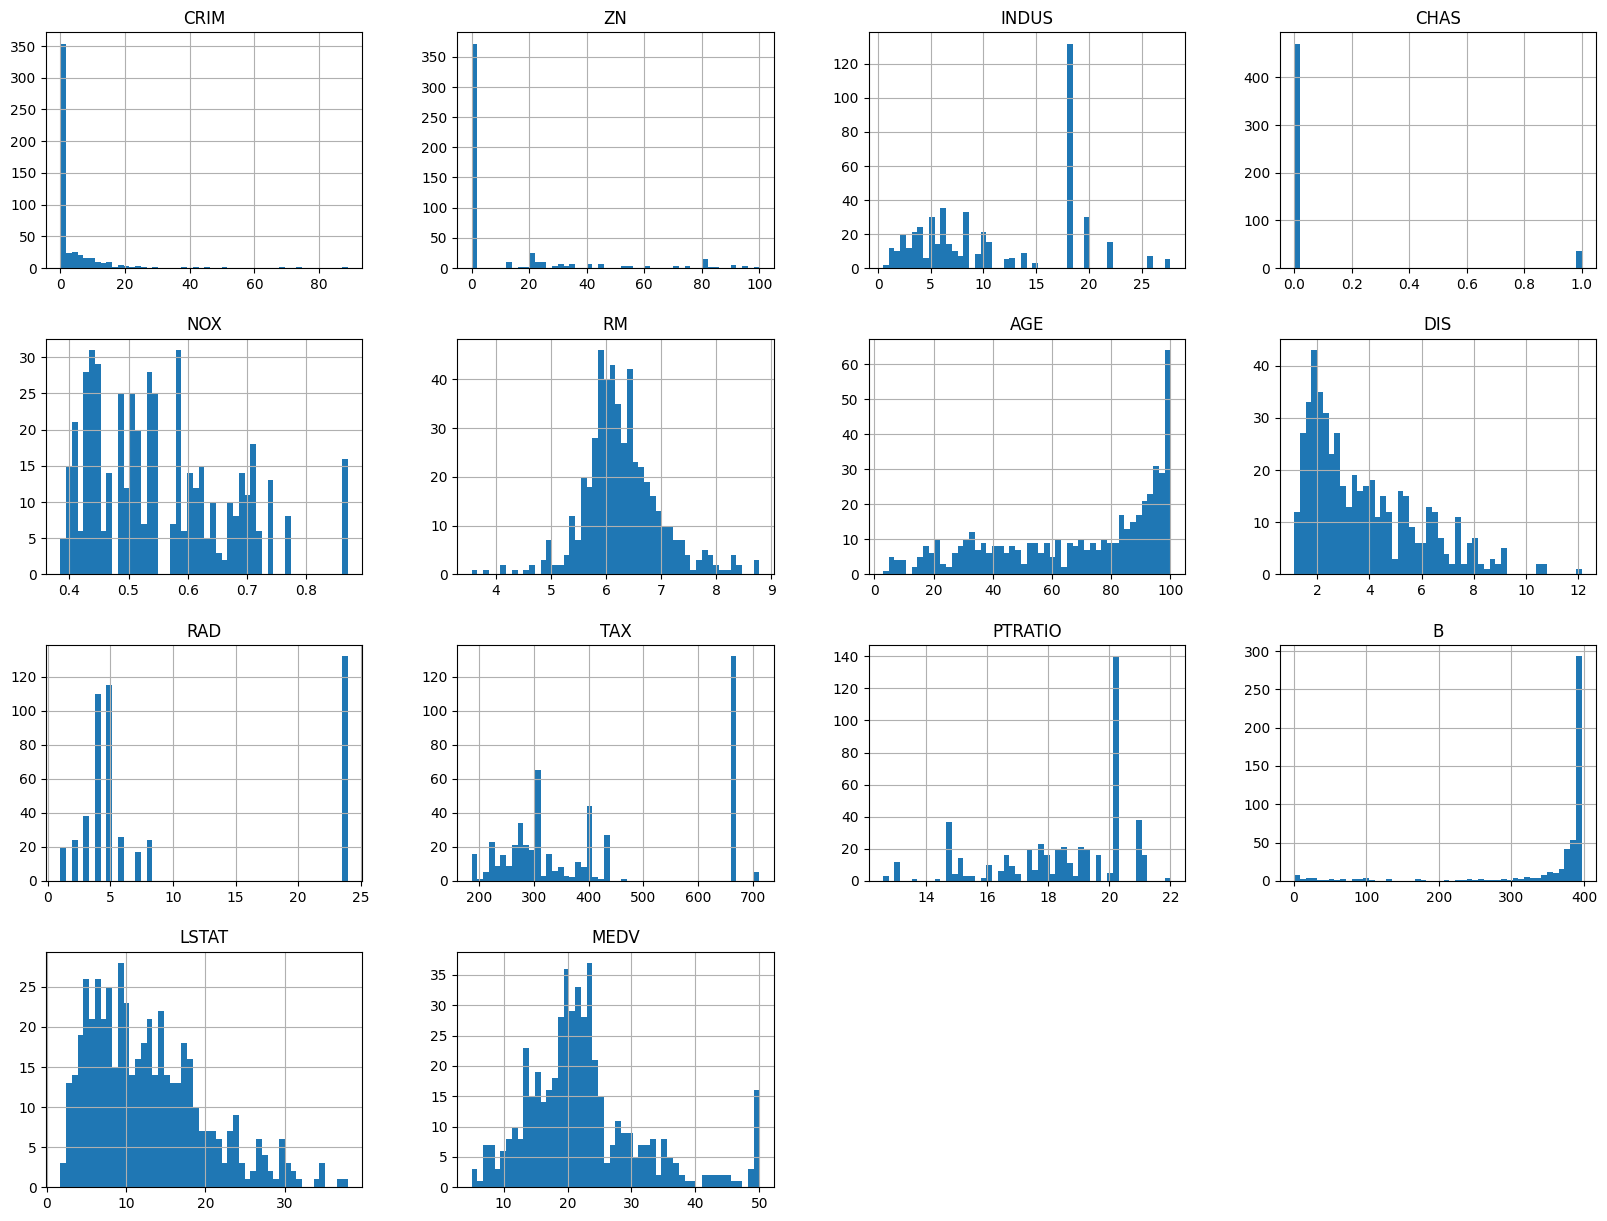

In [7]:
data.hist(bins=50, figsize=(20,15))


In [8]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
data['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [10]:
data['CRIM'].value_counts()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

In [11]:
data['RM'].value_counts()

RM
6.405    3
6.229    3
6.167    3
5.713    3
6.127    3
        ..
6.020    1
6.546    1
5.859    1
6.416    1
6.976    1
Name: count, Length: 441, dtype: int64

## Train Test Spliting 

In [12]:
#for learning purpose
#def split_train_test(data, test_ratio):
 #   np.random.seed(42)
 #   shuffled = np.random.permutation(len(data))
  #  test_set_size = int(len(data) * test_ratio)
   # test_indices = shuffled[:test_set_size]
    #train_indices = shuffled[test_set_size:]
    #return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
#train_data, test_data= split_train_test(data, 0.2)

In [14]:
#print(f"length of train data {len(train_data)} and length test data {len(test_data)}")

In [15]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [16]:
print(f"length of train data {len(train_data)} and length test data {len(test_data)}")

length of train data 404 and length test data 102


In [17]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for tain_index, test_index in split.split(data, data['CHAS']):
    train_data_set = data.loc[tain_index]
    test_data_set = data.loc[test_index]

In [18]:
train_data['CHAS'].value_counts()

CHAS
0    375
1     29
Name: count, dtype: int64

In [19]:
train_data_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [20]:
data = train_data_set.copy()

## Looking for correlation

In [21]:
corr_matrix = data.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.680857
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [23]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

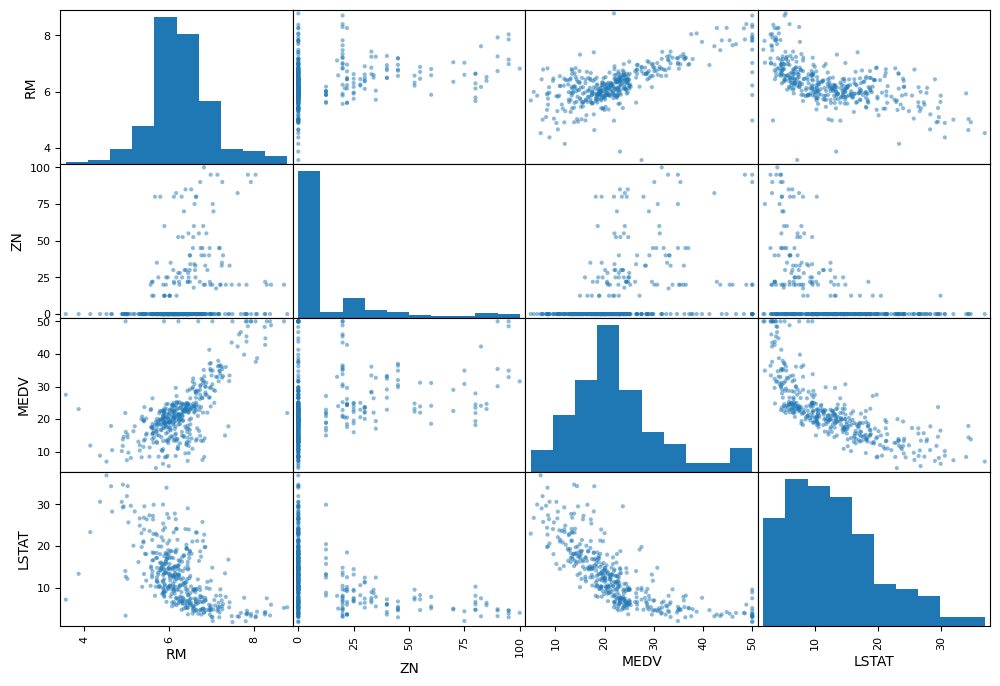

In [24]:
attributes = ['RM', 'ZN', 'MEDV', 'LSTAT']
scatter_matrix(data[attributes], figsize=(12, 8))

<Axes: xlabel='RM', ylabel='MEDV'>

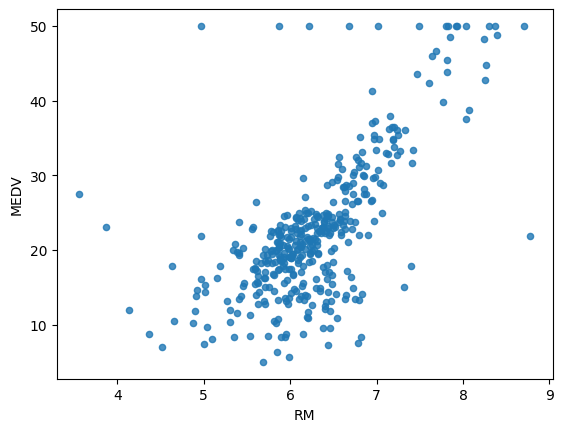

In [25]:
data.plot(kind = 'scatter', x= 'RM', y= 'MEDV', alpha = 0.8 )

## Attribute combination

In [90]:
data['TPR'] = data['TAX'] / data ["RM"]
test_data_set['TPR'] = data['TAX'] / data ["RM"]

In [27]:
data['TPR']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TPR, Length: 404, dtype: float64

In [28]:
data = data.drop("MEDV", axis = 1)

In [29]:
data_labels = train_data_set["MEDV"].astype(float)
type(data_labels)

pandas.core.series.Series

## Missing Attribute

In [30]:
#set the value of RM missing value to value(median)
median = data['RM'].median
median

<bound method Series.median of 254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64>

In [31]:
data['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98      7.82
455    6.525
216    5.888
Name: RM, Length: 404, dtype: object

In [32]:
median1 = data_labels.median()
data_labels.fillna(median1)

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

In [33]:
data.describe() #before we strting filling missng attribute

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TPR
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.696004
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.577122
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,44.910026
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imp_median =SimpleImputer(strategy='median')
imp_median.fit(data)

SimpleImputer(strategy='median')

In [36]:
imp_median.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.20900000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 5.48312199e+01])

In [37]:
x= imp_median.transform(data)
x 

array([[4.81900000e-02, 8.00000000e+01, 3.64000000e+00, ...,
        3.92890000e+02, 6.57000000e+00, 5.15717092e+01],
       [1.50100000e-02, 8.00000000e+01, 2.01000000e+00, ...,
        3.90940000e+02, 5.99000000e+00, 4.22004521e+01],
       [4.87141000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        3.96210000e+02, 1.86800000e+01, 1.02714374e+02],
       ...,
       [8.18700000e-02, 0.00000000e+00, 2.89000000e+00, ...,
        3.93530000e+02, 3.57000000e+00, 3.52941176e+01],
       [4.75237000e+00, 0.00000000e+00, 1.81000000e+01, ...,
        5.09200000e+01, 1.81300000e+01, 1.02068966e+02],
       [4.56000000e-02, 0.00000000e+00, 1.38900000e+01, ...,
        3.92800000e+02, 1.35100000e+01, 4.68750000e+01]])

In [38]:
data_tr = pd.DataFrame(x, columns = data.columns)

In [39]:
data_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TPR
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.536786
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.412918
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,45.017395
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,54.831220
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


## Scikit -Learn Design

### pipeline create

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy = "median")),
    
    ('std_scaler', StandardScaler())
])

In [41]:
data_num_tr = my_pipeline.fit_transform(data_tr)

In [42]:
data_num_tr, data_num_tr.shape

(array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
         -0.86091034, -0.50886303],
        [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
         -0.94116739, -0.80755787],
        [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
          0.81480158,  1.12123315],
        ...,
        [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
         -1.27603303, -1.02768699],
        [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
          0.73869575,  1.10066172],
        [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
          0.09940681, -0.65856363]]),
 (404, 14))

## Selecting a desire model fo perdiction 

### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()
model.fit(data_num_tr, data_labels)

LinearRegression()

In [45]:
some_data = data_tr.iloc[:5]

In [46]:
some_labels = data_labels.iloc[:5]

In [47]:
prepared_data = my_pipeline.transform(some_data)

In [48]:
model.predict(prepared_data)

array([22.74142142, 26.97794513, 18.97894706, 24.93653477, 24.08296435])

In [49]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [50]:
#Error
from sklearn.metrics import mean_squared_error
data_prediction = model.predict(data_num_tr)
lin_mse = mean_squared_error(data_labels, data_prediction)
lin_rmse = np.sqrt(lin_mse)

In [51]:
lin_rmse

4.277610497216961

### Decision tree regression

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [53]:
model1 = DecisionTreeRegressor()
model1.fit(data_num_tr, data_labels)

DecisionTreeRegressor()

In [54]:
some_data = data_tr.iloc[:5]
some_labels = data_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [55]:
model1.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [56]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [57]:
#Error
data_prediction = model1.predict(data_num_tr)
lin_mse = mean_squared_error(data_labels, data_prediction)
lin_rmse = np.sqrt(lin_mse)

In [58]:
lin_rmse

0.0

### Random forest

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model2 = RandomForestRegressor()
model2.fit(data_num_tr, data_labels)

RandomForestRegressor()

In [61]:
some_data = data_tr.iloc[:5]
some_labels = data_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [75]:
model2.predict(prepared_data)

array([22.239, 25.787, 16.098, 23.305, 23.549])

In [63]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [73]:
#Error
data_prediction = model2.predict(data_num_tr)
lin_mse = mean_squared_error(data_labels, data_prediction)
lin_rmse = np.sqrt(lin_mse)

In [74]:
lin_rmse

1.2526589344033727

## Using better validation technique - Cross Validation 

In [66]:
# for Desion Tree
from sklearn.model_selection import cross_val_score
score = cross_val_score(model1, data_num_tr, data_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_score_d = np.sqrt(-score)


In [67]:
rmse_score_d

array([3.83313538, 5.30496776, 4.99665742, 4.34306287, 4.0655258 ,
       3.46399336, 5.27351875, 3.64369318, 3.35790113, 3.73507028])

In [68]:
# for Regression
score = cross_val_score(model1, data_num_tr, data_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_score_r = np.sqrt(-score)

In [69]:
rmse_score_r

array([3.74136404, 5.58089074, 4.92061368, 4.13267763, 3.54862649,
       2.99599733, 4.58317575, 3.37564809, 3.40400499, 3.81244672])

In [76]:
# for Random forest
score = cross_val_score(model2, data_num_tr, data_labels, scoring = 'neg_mean_squared_error', cv = 10)
rmse_score_ran = np.sqrt(-score)

In [77]:
rmse_score_ran

array([2.84183061, 2.78913316, 4.41958993, 2.61730668, 3.52371513,
       2.69838233, 4.80229183, 3.30929677, 3.26604762, 3.40209104])

In [70]:
# function for details in scores
def print_scores(score):
    print(f"Scores: {score}")
    print(f"Mean: {score.mean()}")
    print(f"Standard Deviation: {score.std()}")

In [71]:
print_scores(rmse_score_d)

Scores: [3.83313538 5.30496776 4.99665742 4.34306287 4.0655258  3.46399336
 5.27351875 3.64369318 3.35790113 3.73507028]
Mean: 4.201752592824734
Standard Deviation: 0.7041052286987122


In [72]:
print_scores(rmse_score_r)

Scores: [3.74136404 5.58089074 4.92061368 4.13267763 3.54862649 2.99599733
 4.58317575 3.37564809 3.40400499 3.81244672]
Mean: 4.009544547460711
Standard Deviation: 0.7591037462282977


In [78]:
print_scores(rmse_score_ran)

Scores: [2.84183061 2.78913316 4.41958993 2.61730668 3.52371513 2.69838233
 4.80229183 3.30929677 3.26604762 3.40209104]
Mean: 3.366968509508399
Standard Deviation: 0.6947044605025944


## Save model of random forest 

In [79]:
from joblib import dump, load
dump(model2, 'housing.joblib')

['housing.joblib']

### test model

In [91]:
x_test = test_data_set.drop('MEDV', axis = 1)
x_test.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TPR
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,0.0
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,NaN
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,NaN
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,NaN
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,NaN
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,NaN
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,NaN
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,NaN


In [92]:
y_test = test_data_set['MEDV'].copy()

In [93]:
y_test

342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64

In [95]:
 x_test_prepared = my_pipeline.transform(x_test)

In [98]:
final_prediction = model2.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [99]:
final_rmse

3.1108634858268815

In [100]:
# test_data_set.to_csv('test_data.csv', index = False)